In [1]:
import sys
sys.path.append('../../')
import os

import numpy as np 
import scipy as sp

# Importing the marcia package
%load_ext autoreload
%autoreload 2
from marcia import Kernels
from marcia import Cosmology
from marcia import Data
from marcia import params

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# To-Do list:
# 1. install pycamb or class integration
# 2. To adopt the data module to the CMB data loading better !!

In [3]:
# set data
data_list = ['Planck_TT','Planck_EE','Planck_TE']
d = Data(data_list)

Nuisance parameters are set to default values


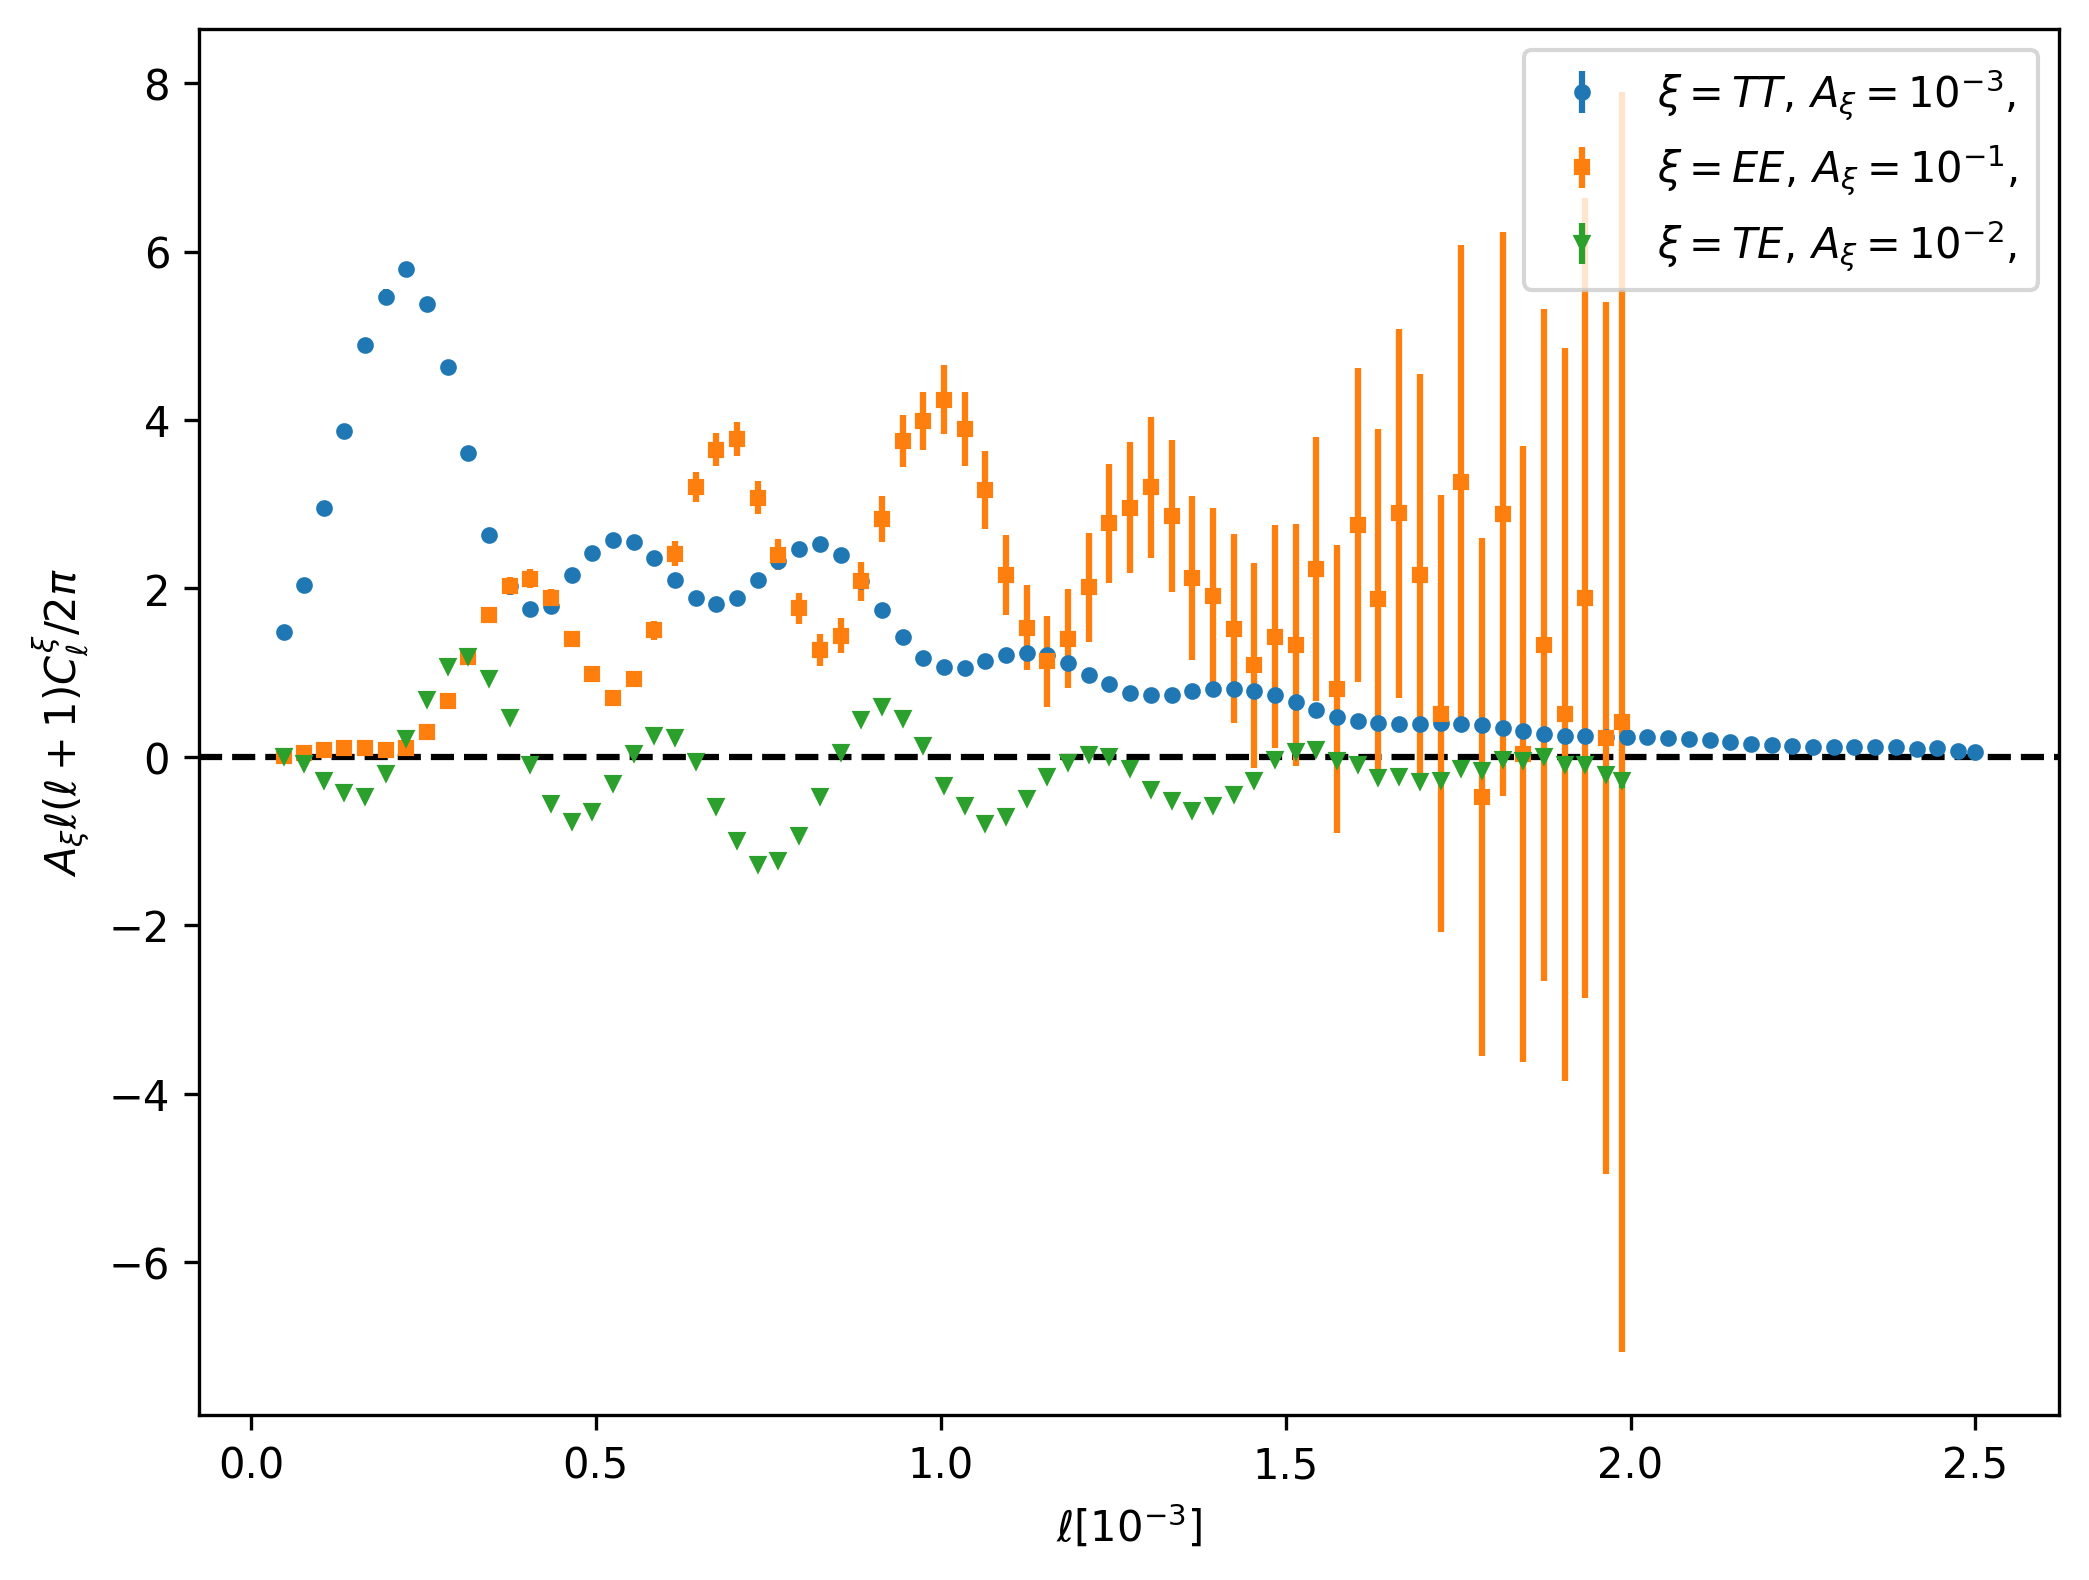

In [23]:
fig = plt.figure(figsize=(8,6), dpi = 300)
plt.xlabel(r'$\ell [10^{-3}]$')
plt.ylabel(r'$A_{\xi}\ell(\ell+1)C_\ell^{\xi}/2\pi$')
plt.axhline(0,color='k',ls='--')

x,y, cov = d()
# To plot teh three data sets in the same panel after some rescaling of the data in teh y axis
plt.errorbar(d.x['x0']/1000,d.y['y0']/1000,yerr=np.sqrt(np.diag(d.covar['covar0']))/1000,fmt='o', markersize = 3, label=r'$\xi = TT, \, A_{\xi } = 10^{-3}$, ')
plt.errorbar(d.x['x1']/1000,d.y['y1']/10,yerr=np.sqrt(np.diag(d.covar['covar1'])/10),fmt='s', markersize = 3, label=r'$\xi = EE, \, A_{\xi } = 10^{-1}$, ')
plt.errorbar(d.x['x2']/1000,d.y['y2']/100,yerr=np.sqrt(np.diag(d.covar['covar2']))/100,fmt='v', markersize = 3, label=r'$\xi = TE, \, A_{\xi } = 10^{-2}$, ')

plt.gca().legend(loc='upper right',fontsize=10)


In [24]:
data_ker = list(d.x.values())
filename = os.path.join(os.getcwd(),'GPconfig_CMB.ini')
K = Kernels(data_ker, filename = filename)

Loading the config file from /workspaces/marcia/Notebooks/CMB/../../marcia/GPconfig.ini ... 
Number of tasks: 3
Number of datasets: 3
Kernels: ['SE', 'SE', 'SE']
Perfroming a multi task Gaussian process regression using SE kernels and 3 tasks


In [34]:
import emcee 
from marcia import likelihood_GP as lk

log_prob = lk.log_prob(data = list(d.x.values()), filename = filename)

def run_MCMC():
    # Set the dimensionality of the problem
    ndim = 6
    # Set the number of walkers. It has to be an even number
    nwalkers = 100
    # Set the number of iterations
    niterations = 1000
    # Set the number of burnin iterations
    nburnin = 100

    # Set the initial position of the walkers
    p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

    # Set the backend
    backend = emcee.backends.HDFBackend('test.h5')
    backend.reset(nwalkers, ndim)

    log_prob = lk.log_prob(data = list(d.x.values()), filename = filename)

    def log_prob(theta):
        return lk.log_prob(theta, K, d)

    # Set the sampler
    sampler = emcee.EnsembleSampler(nwalkers, ndim, K.log_prob, backend=backend)
    

AttributeError: module 'marcia.likelihood_GP' has no attribute 'log_prob'

In [4]:
%load_ext autoreload
%autoreload 2
from marcia import Likelihood_GP as lk
log_prob = lk(data = data_list, GP_filename = filename)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'filename' is not defined

In [41]:
log_prob.chisq([[1,2],[3,4],[5,2]])

10085740.618530309